# Problem 1: Association Rules

In [1]:
# NON-EDITABLE CODE CELL
# You may run this cell, but do not edit it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

## 1.1

In [2]:
# CODE CELL

# CODE START

df = pd.read_csv("sample order basket.csv")

# CODE END

df

,OrderNum,Product
0,1000,eggs
1,1001,bread
2,1002,eggs
3,1002,bread
4,1002,flour
...,...,...
1068,1496,bread
1069,1497,jam
1070,1498,bread
1071,1499,eggs


## 1.2

In [3]:
# CODE CELL

# CODE START

ind = df["OrderNum"].astype(int).unique()
col = df["Product"].astype(object).unique()

col.sort()
ind.sort()

data = np.zeros(shape=(ind.size,col.size))

indexing = {"bread": 0, "cheese": 1, "eggs": 2, "flour": 3, "jam": 4}

indexer = 0
grouped = df.groupby(["OrderNum"])


for id in ind:
    club = grouped.get_group(id)
    r_data = np.zeros(col.size)
    
    for index, row in club.iterrows():
        r_data[indexing[row["Product"]]] = 1 
        
    data[indexer] = r_data
    indexer += 1

    
binary_table = pd.DataFrame(data=data, index=ind, columns=col)

# CODE END

binary_table

,bread,cheese,eggs,flour,jam
1000,0.0,0.0,1.0,0.0,0.0
1001,1.0,0.0,0.0,0.0,0.0
1002,1.0,0.0,1.0,1.0,0.0
1003,1.0,0.0,1.0,0.0,1.0
1004,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
1495,1.0,0.0,1.0,1.0,0.0
1496,1.0,1.0,1.0,0.0,0.0
1497,0.0,0.0,0.0,0.0,1.0
1498,1.0,0.0,0.0,0.0,0.0


## 1.3

In [4]:
# CODE CELL

# CODE START

# binary_table.drop_duplicates()
r_values = binary_table.value_counts()

combination = []
count = []

report_indexing = ["bread", "cheese", "eggs", "flour", "jam"]

        
for index, value in r_values.items():
    indices = [index for index, element in enumerate(index) if element == 1]
    pattern = [report_indexing[item] for item in indices ]
    
    count.append(value)
    combination.append(pattern)

comb = pd.Series(data = combination,dtype=object, name = "Combination")
con = pd.Series(data = count, dtype=int, name = "Count")

frame = {"Combination":comb, "Count":con}

report = pd.DataFrame(frame)
report = report.sort_values(by = "Count", ascending = False)

# CODE END

report

,Combination,Count
0,[bread],65
1,"[bread, jam]",57
2,"[bread, eggs]",47
3,"[bread, eggs, jam]",46
4,[eggs],31
5,[jam],26
6,"[bread, eggs, flour]",21
7,"[bread, flour, jam]",18
8,"[eggs, jam]",17
9,"[bread, cheese, eggs]",17


# Problem 2: A Plot of the International Space Station's Location

## 2.1

In [ ]:
# CODE CELL

import json
import codecs

import time
from datetime import datetime, timedelta

# CODE START

iss_data = []

start_time = datetime.now()
end_time = start_time + timedelta(minutes = 30)

web = "http://api.open-notify.org/iss-now.json"

while(end_time > datetime.now()):
    r = requests.get(url = web)
    data = r.json()

    time.sleep(10) 
    iss_data.append(data)

with open("iss-data.json", "wb") as f:
    json.dump(iss_data, codecs.getwriter("utf-8")(f), ensure_ascii=False)


# CODE END

## 2.2

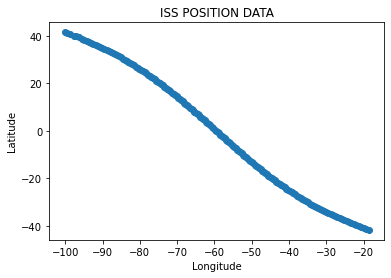

In [6]:
# CODE CELL

import json
import codecs

# CODE START

json_file = open("iss-data.json")
ISS = json.load(json_file)

x = []
y = []

for data in ISS:
    x.append(float(data["iss_position"]["longitude"]))
    y.append(float(data["iss_position"]["latitude"]))

json_file.close()

plt.plot(x,y, marker = "o")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("ISS POSITION DATA")
plt.show()

# CODE END